<a href="https://colab.research.google.com/github/VirgileH24/DataScience_Lessons/blob/main/Exercice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn
from sklearn import datasets


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_train_insurance.csv to data_train_insurance (1).csv
Saving data_type.csv to data_type.csv


In [ ]:
train = pd.read_csv("data_train_insurance.csv",sep=";",na_values="?",dtype={'CLA_HISTORY': 'object','CLA_HISTORY_1Y': 'object','CLA_HISTORY_3Y': 'object',
                    'CLA_BM_TPL_DECLARED': 'object','VEH_TransmissionId': 'object','PER_Matrimonial_Status': 'object','VEH_Injection_Mode': 'object',
                    'VEH_Drive_type': 'object','VEH_Body': 'object','VEH_Segment': 'object','PER_Parking_Type': 'object','BEH_vehicule_usage': 'object','VEH_High_Risk_Vehicle': 'object',
                    'PER_Insured_Before': 'object','VEH_fuel_type':'object','VEH_Actual_Value':'float'})
train.head()
#train.dtypes

,Id,Response_Market_Index,PROD_Formula,PER_sex,PER_Sex_Second_Driver,VEH_Actual_Value,CLA_HISTORY,CLA_HISTORY_1Y,CLA_HISTORY_3Y,CLA_BM_TPL_DECLARED,BEH_Mileage,PER_KIDS_ON_BOARD_ID,VEH_Number_of_doors,VEH_Top_Speed,BEH_Number_Year_Insured,VEH_TransmissionId,PER_Age_Main_Driver,PER_License_Age_Main_Driver,PER_License_Age_Second_Driver,PER_Matrimonial_Status,VEH_Age,VEH_Injection_Mode,VEH_fuel_type,BEH_vehicule_usage,VEH_Drive_type,VEH_Body,VEH_Segment,PER_Parking_Type,CLA_BM,VEH_engine_HP,VEH_pw_proportion,VEH_High_Risk_Vehicle,PER_previous_insurer,PER_Is_second_driver,PER_Age_oldest_child,PER_Second_Driver_Age,PER_Insured_Before,VEH_Weight,GEO_Lat,GEO_Long
0,1638099,435.0,BASIC,2,0,4600.0,1,1,1,1,13.0,3.0,4.0,160.0,10.0,7,59.0,31.0,-1.0,2,15.0,389999,1,1,50001,9,30003,3,10.0,90.0,59.0,2,5.0,1.0,-99.0,-1.0,2,1125.0,-1.790876,-0.431147
1,1657342,609.0,FULL,1,0,68315.0,1,1,1,2,15.0,1.0,5.0,248.0,6.0,7,32.0,15.0,-1.0,2,3.0,380002,1,1,50002,9,30005,1,6.0,218.0,106.0,2,17.0,1.0,2.0,-1.0,2,1510.0,1.675824,-4.431147
2,1657529,609.0,FULL,1,0,68315.0,1,1,1,2,15.0,1.0,5.0,248.0,6.0,7,32.0,15.0,-1.0,2,3.0,380002,1,1,50002,9,30005,1,6.0,218.0,106.0,2,17.0,1.0,2.0,-1.0,2,1510.0,1.675824,-4.431147
3,1662071,404.0,FULL,1,2,11005.0,1,1,1,2,14.0,1.0,5.0,173.0,7.0,7,31.0,7.0,12.0,2,8.0,380002,1,1,50001,9,30002,3,7.0,80.0,51.0,2,6.0,2.0,1.0,31.0,2,1170.0,-0.440876,1.285553
4,1662074,404.0,FULL,1,2,11005.0,1,1,1,2,14.0,1.0,5.0,173.0,7.0,7,31.0,7.0,12.0,2,8.0,380002,1,1,50001,9,30002,3,7.0,80.0,51.0,2,6.0,2.0,1.0,31.0,2,1170.0,-0.440876,1.285553


In [ ]:
train.dtypes

Id                                 int64
Response_Market_Index            float64
PROD_Formula                      object
PER_sex                            int64
PER_Sex_Second_Driver              int64
VEH_Actual_Value                   int64
CLA_HISTORY                      float64
CLA_HISTORY_1Y                   float64
CLA_HISTORY_3Y                   float64
CLA_BM_TPL_DECLARED              float64
BEH_Mileage                      float64
PER_KIDS_ON_BOARD_ID             float64
VEH_Number_of_doors              float64
VEH_Top_Speed                    float64
BEH_Number_Year_Insured          float64
VEH_TransmissionId               float64
PER_Age_Main_Driver              float64
PER_License_Age_Main_Driver      float64
PER_License_Age_Second_Driver    float64
PER_Matrimonial_Status           float64
VEH_Age                          float64
VEH_Injection_Mode               float64
VEH_fuel_type                    float64
BEH_vehicule_usage               float64
VEH_Drive_type  

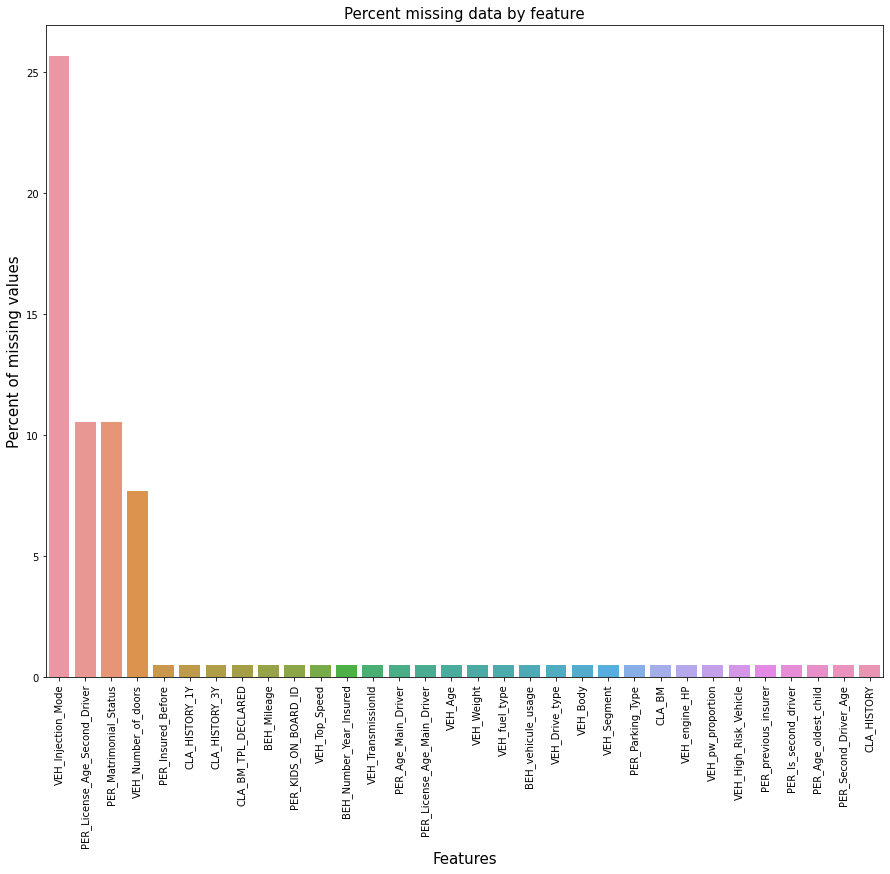

In [ ]:
def missing_values_vizu(df):
    missing_by_col=df.isnull().sum()
    col_with_na=missing_by_col[missing_by_col>0]
    percent_missing=(col_with_na/len(df))*100
    percent_missing=percent_missing.sort_values(ascending=False)
    
    plt.figure(1, figsize=(15, 12))
    sns.barplot(x=percent_missing.index,y=percent_missing)

    plt.xticks(rotation='90')
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)

missing_values_vizu(train)

In [ ]:
def imputeNA(df):
    #columns with missigns values
    cols_with_missings=[col for col in df.columns if df[col].isnull().any()]
    #numericals and categorials columns with missings values
    cols_num_with_missings=[col for col in df.loc[:,cols_with_missings].columns
                        if df[col].dtypes=='float64' or df[col].dtypes=='int64']
    cols_cat_with_missings=[col for col in df.loc[:,cols_with_missings].columns
                        if df[col].dtypes=='object']
    
    cat_subset=df.loc[:,cols_cat_with_missings]
    num_subset=df.loc[:,cols_num_with_missings]
    
    #mode imputationfor categorial columns
    for cat_col in cat_subset.columns:
        df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)
        
    #mean imputaion in the numerical columns
    for col in num_subset.columns:
        df[col].fillna(df[col].mean(),inplace=True)
        
    return df
  
train = imputeNA(train)
train.isnull().sum()

Id                               0
Response_Market_Index            0
PROD_Formula                     0
PER_sex                          0
PER_Sex_Second_Driver            0
VEH_Actual_Value                 0
CLA_HISTORY                      0
CLA_HISTORY_1Y                   0
CLA_HISTORY_3Y                   0
CLA_BM_TPL_DECLARED              0
BEH_Mileage                      0
PER_KIDS_ON_BOARD_ID             0
VEH_Number_of_doors              0
VEH_Top_Speed                    0
BEH_Number_Year_Insured          0
VEH_TransmissionId               0
PER_Age_Main_Driver              0
PER_License_Age_Main_Driver      0
PER_License_Age_Second_Driver    0
PER_Matrimonial_Status           0
VEH_Age                          0
VEH_Injection_Mode               0
VEH_fuel_type                    0
BEH_vehicule_usage               0
VEH_Drive_type                   0
VEH_Body                         0
VEH_Segment                      0
PER_Parking_Type                 0
CLA_BM              

In [ ]:
train.VEH_Drive_type.value_counts()

50001    8618
50002     578
50007     440
50003     156
50004      84
59999      63
50006      23
50005      21
Name: VEH_Drive_type, dtype: int64

In [ ]:
train.PROD_Formula.value_counts()
train.replace(to_replace=["BASIC","FULL"],value=[0,1])

FULL     6343
BASIC    3640
Name: PROD_Formula, dtype: int64

VarName    object
Type       object
dtype: object

Distribution de la Target

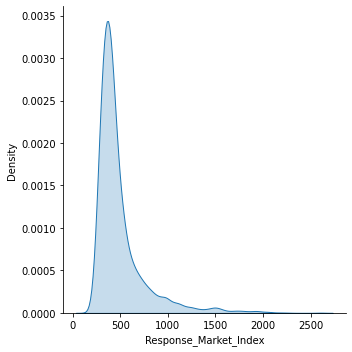

In [ ]:
sns.displot(train,x = "Response_Market_Index", kind = "kde" , fill = True )

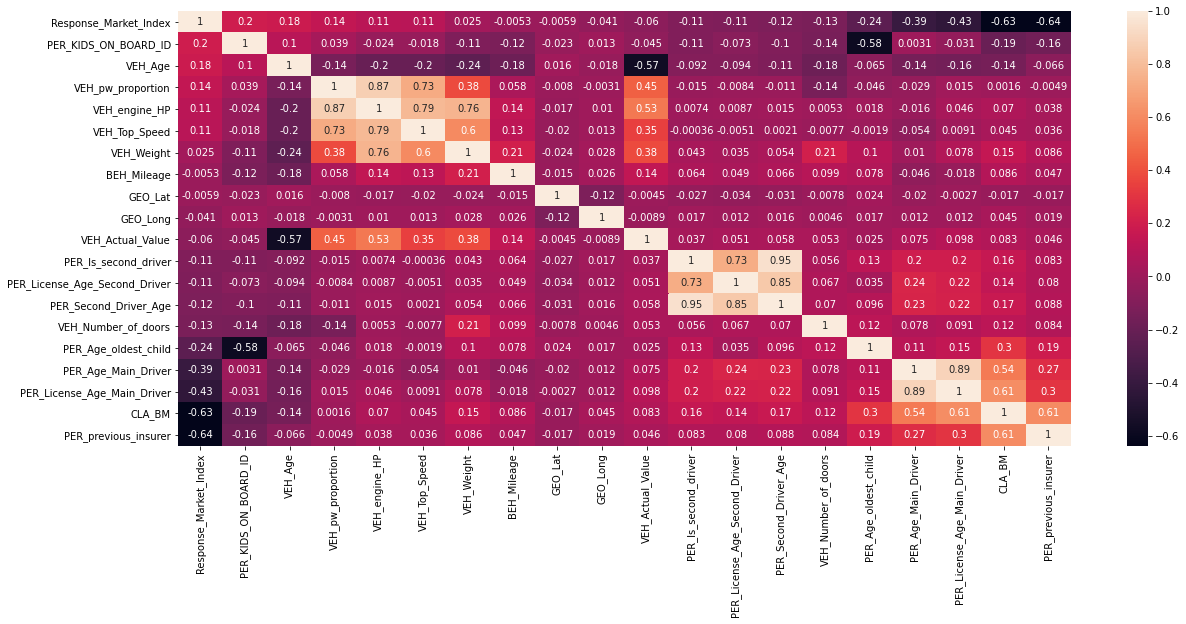

In [ ]:
label_float=[col for col in train.columns if train[col].dtypes=='float64']
train_float=train.loc[:,label_float]

def plot_corrMatrix(df,Nvariable,target):
  corr=df.corr()
  cols = corr.nlargest(Nvariable, target)[target].index
  cm = np.corrcoef(df[cols].values.T)
  sns.heatmap(cm,annot=True,yticklabels=cols.values,xticklabels=cols.values)
  

plt.figure(1, figsize=(20, 8))
plot_corrMatrix(train_float,20,"Response_Market_Index")